Project: ICRC Collaboration. CAS Applied Data Sciencem Module 1. University of Bern

# Collaborative work at ICRC
## Data analysis on collaborative spaces

### Data capture and cleaning

In [1]:
#import necessary modules
import pandas as pd
import math
import matplotlib.pyplot as plt
#in addition, we have to install the xlrd and the Seaborn modules in the working environment (done in anaconda)

In [2]:
#import dataframe from excel extraction of Sharepoint
Allfiles = pd.read_excel ('DocumentData_ALL.xlsx', header=0)
#we have a quick look at it
Allfiles

,Name,List,Location,Content type,File extension,Site collection address,Size (MB),Version number,Site address,Total size for all versions (MB),Created date,Last modified date
0,200903 - 07 PfR21_HQ Budget - Decelerate - Inp...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team PowerPoint,pptx,https://collab-bo.ext.icrc.org/sites/FAD/,1.44,3.200,https://collab-bo.ext.icrc.org/sites/FAD/,49.54,2020-08-28 16:46:48,2020-09-04 16:08:09
1,FTE_Control_DP.xlsm,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,xlsm,https://collab-bo.ext.icrc.org/sites/FAD/,0.62,0.128,https://collab-bo.ext.icrc.org/sites/FAD/,71.46,2020-02-05 03:17:37,2020-09-04 15:24:16
2,2020-09-03_ICRC_Letter re IRS Correspondence w...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,pdf,https://collab-bo.ext.icrc.org/sites/FAD/,0.23,0.100,https://collab-bo.ext.icrc.org/sites/FAD/,0.23,2020-09-04 15:22:31,2020-09-04 15:22:38
3,supporting-organizations-practice-guide.pdf,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,pdf,https://collab-bo.ext.icrc.org/sites/FAD/,0.14,0.200,https://collab-bo.ext.icrc.org/sites/FAD/,0.28,2020-08-06 15:06:28,2020-09-04 15:21:36
4,2019-06-19_PWS_JEH_FL-Bar-Tax_intl-charitable-...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,pdf,https://collab-bo.ext.icrc.org/sites/FAD/,0.18,0.200,https://collab-bo.ext.icrc.org/sites/FAD/,0.36,2020-08-06 15:06:10,2020-09-04 15:21:14
...,...,...,...,...,...,...,...,...,...,...,...,...
209763,ICRCEcoSec-OPGuidelines-AssistDoctrine49-EN-vF...,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,doc,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.26,1.000,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.51,2014-08-18 13:46:08,2014-08-20 19:46:35
209764,140618-ICRCEcoSec-Brief-CashTransfers-vFINAL.docx,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,docx,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.53,1.000,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.53,2014-08-20 13:38:52,2014-08-20 19:45:58
209765,140710-ICRCEcoSec-Brief-Accountability-EN-vFIN...,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,pdf,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.11,1.000,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.11,2014-08-20 13:43:40,2014-08-20 19:44:40
209766,140710-ICRCEcoSec-Brief-Accountability-EN-vFIN...,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,docx,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.12,1.000,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.24,2014-08-20 13:40:34,2014-08-20 19:43:22


In [3]:
#we check also how the import was done automatically. Do we need to change column types? Is the data what we expected?
Allfiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209768 entries, 0 to 209767
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Name                              209768 non-null  object        
 1   List                              209768 non-null  object        
 2   Location                          209768 non-null  object        
 3   Content type                      209768 non-null  object        
 4   File extension                    209616 non-null  object        
 5   Site collection address           209768 non-null  object        
 6   Size (MB)                         209768 non-null  float64       
 7   Version number                    209768 non-null  float64       
 8   Site address                      209768 non-null  object        
 9   Total size for all versions (MB)  209768 non-null  float64       
 10  Created date                    

We need to clean data, as it is not appropriate to properly work on the questions we want to address. Namely, we have to:
- Get the service name of each document. For that, we will can use either the 'Location' or 'site collection adress'. Those are url adresses containing the service name. Site collection adress has the advantage that the last string is the name of the service 

In [4]:
# we proceed with the cleaning
Allfiles['Site collection address'] = Allfiles['Site collection address'].str.replace('https://collab-bo.ext.icrc.org/sites/','')
Allfiles['Site collection address'] = Allfiles['Site collection address'].str.replace('/','')
Allfiles['Site collection address'] = Allfiles['Site collection address'].str.replace('TS_','')
#and we print the result to see if it worked
Allfiles['Site collection address']

0            FAD
1            FAD
2            FAD
3            FAD
4            FAD
           ...  
209763    ASSIST
209764    ASSIST
209765    ASSIST
209766    ASSIST
209767    ASSIST
Name: Site collection address, Length: 209768, dtype: object

Now, we will rename several columns to better fit their needs:
- 'File extension' has a space in the title. We will remove it since it will be easier to code later. We take adventage of this operation to shorten the title to File_type
- 'site collection address' can tells us now the name of the service. It is better to rename the column to Service in order to reflect this.
- 'Size (MB) has space and parentesis. We will rename it to SizeMB
- Since we will have to work with Version number extensively, we rename it to something shorter and simpler: Version
- Total size for all versions (MB) is too long, too many spaces, and some elements that are python text, such as 'for'. We rename it to Total_sizeMB
- Created date and Last Modified date contain also spaces. We will rename them to Created and Last_modified.

In [5]:
#to do it at once, we will use a dictionary
Allfiles = Allfiles.rename(columns = {'File extension': 'File_type', 'Site collection address': 'Service', 'Size (MB)': 'SizeMB', 'Version number': 'Version', 'Total size for all versions (MB)': 'Total_sizeMB', 'Created date': 'Created', 'Last modified date': 'Last_modified'})

In [6]:
#now we look if it worked well
Allfiles.head(1)

,Name,List,Location,Content type,File_type,Service,SizeMB,Version,Site address,Total_sizeMB,Created,Last_modified
0,200903 - 07 PfR21_HQ Budget - Decelerate - Inp...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team PowerPoint,pptx,FAD,1.44,3.2,https://collab-bo.ext.icrc.org/sites/FAD/,49.54,2020-08-28 16:46:48,2020-09-04 16:08:09


### Working with version number

Version number (now called just Version) is a very important data. It tells us how many times a document has been modified. However, the information provided by sharepoint tell us also some information irrelevant for our purpose: The difference between major and minor version. Sharepoint represents major versions as the integer part of a float number, and minor versions as the decimal part. A document version 2.0 has been updated twice as a major version. A document 0.2 has been updated twice as a minor version, For our purpose, both documents represent exactly the same case: a document updated twice.
We will proceed as follows:
- The document is a false float (2.0 and 0.2 are equivalent) we will transform it into a string. Funnily enough, when we transform decimals higher than 3 digits, Pandas creates and incredibly long number. As an example, 2.111 becomes 2.1109...9 (14 positions). To avoid this behaviour, we will set the .round function to 3 digits
- Then, we will split the left side of the point, leaving it in the existing column
- We will do the same with the right side, and save it in another new column 'Minor'
- We will transform then into integer columns, since they now really represent a number (how many times has the document been updated)
- And we will save it in the first column, that we will keep. 
We could create new columns for that, but this will expand the size of our dataframe unnecessarily

In [7]:
Allfiles['Version'] = Allfiles['Version'].round(3).astype(str)
Allfiles.info()
#now we need to work on the versions to show the whole history of modifications of a file. 
#for that, we split the column "version number" in minor and major vesion, and we sum both in a new column "total version"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209768 entries, 0 to 209767
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           209768 non-null  object        
 1   List           209768 non-null  object        
 2   Location       209768 non-null  object        
 3   Content type   209768 non-null  object        
 4   File_type      209616 non-null  object        
 5   Service        209768 non-null  object        
 6   SizeMB         209768 non-null  float64       
 7   Version        209768 non-null  object        
 8   Site address   209768 non-null  object        
 9   Total_sizeMB   209768 non-null  float64       
 10  Created        209768 non-null  datetime64[ns]
 11  Last_modified  209768 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 19.2+ MB


In [8]:
#now that we have transformed it into string, we split it and assign left and right parts to new columns
Allfiles[['Version', 'minor']] = Allfiles['Version'].str.split('.', expand=True)
Allfiles

,Name,List,Location,Content type,File_type,Service,SizeMB,Version,Site address,Total_sizeMB,Created,Last_modified,minor
0,200903 - 07 PfR21_HQ Budget - Decelerate - Inp...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team PowerPoint,pptx,FAD,1.44,3,https://collab-bo.ext.icrc.org/sites/FAD/,49.54,2020-08-28 16:46:48,2020-09-04 16:08:09,2
1,FTE_Control_DP.xlsm,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,xlsm,FAD,0.62,0,https://collab-bo.ext.icrc.org/sites/FAD/,71.46,2020-02-05 03:17:37,2020-09-04 15:24:16,128
2,2020-09-03_ICRC_Letter re IRS Correspondence w...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,pdf,FAD,0.23,0,https://collab-bo.ext.icrc.org/sites/FAD/,0.23,2020-09-04 15:22:31,2020-09-04 15:22:38,1
3,supporting-organizations-practice-guide.pdf,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,pdf,FAD,0.14,0,https://collab-bo.ext.icrc.org/sites/FAD/,0.28,2020-08-06 15:06:28,2020-09-04 15:21:36,2
4,2019-06-19_PWS_JEH_FL-Bar-Tax_intl-charitable-...,10. Finance,https://collab-bo.ext.icrc.org/sites/FAD/Finan...,ICRC Team Document,pdf,FAD,0.18,0,https://collab-bo.ext.icrc.org/sites/FAD/,0.36,2020-08-06 15:06:10,2020-09-04 15:21:14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
209763,ICRCEcoSec-OPGuidelines-AssistDoctrine49-EN-vF...,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,doc,ASSIST,0.26,1,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.51,2014-08-18 13:46:08,2014-08-20 19:46:35,0
209764,140618-ICRCEcoSec-Brief-CashTransfers-vFINAL.docx,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,docx,ASSIST,0.53,1,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.53,2014-08-20 13:38:52,2014-08-20 19:45:58,0
209765,140710-ICRCEcoSec-Brief-Accountability-EN-vFIN...,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,pdf,ASSIST,0.11,1,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.11,2014-08-20 13:43:40,2014-08-20 19:44:40,0
209766,140710-ICRCEcoSec-Brief-Accountability-EN-vFIN...,05. Resource Centres,https://collab-bo.ext.icrc.org/sites/TS_ASSIST...,ICRC Team Document,docx,ASSIST,0.12,1,https://collab-bo.ext.icrc.org/sites/TS_ASSIST/,0.24,2014-08-20 13:40:34,2014-08-20 19:43:22,0


In [9]:
#now that we have splitted the two values, we transform them as integers and we sum them
convert_dict = {'Version': 'int64', 'minor': 'int64'} 
Allfiles = Allfiles.astype(convert_dict)
Allfiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209768 entries, 0 to 209767
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Name           209768 non-null  object        
 1   List           209768 non-null  object        
 2   Location       209768 non-null  object        
 3   Content type   209768 non-null  object        
 4   File_type      209616 non-null  object        
 5   Service        209768 non-null  object        
 6   SizeMB         209768 non-null  float64       
 7   Version        209768 non-null  int64         
 8   Site address   209768 non-null  object        
 9   Total_sizeMB   209768 non-null  float64       
 10  Created        209768 non-null  datetime64[ns]
 11  Last_modified  209768 non-null  datetime64[ns]
 12  minor          209768 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory usage: 20.8+ MB


In [10]:
#And now we sum both columns, Version and minor, in Version to have total versions
Allfiles['Version'] = Allfiles['Version']+Allfiles['minor']
Allfiles['Version']

0           5
1         128
2           1
3           2
4           2
         ... 
209763      1
209764      1
209765      1
209766      1
209767      1
Name: Version, Length: 209768, dtype: int64

In [11]:
#we create our final dataframe with the data that we need,
#namely: File_type, Service, SizeMB, Version, Total_sizeMB, Created, Last_modified
df = Allfiles[['File_type', 'Service', 'SizeMB', 'Version', 'Total_sizeMB', 'Created', 'Last_modified']].copy()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209768 entries, 0 to 209767
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   File_type      209616 non-null  object        
 1   Service        209768 non-null  object        
 2   SizeMB         209768 non-null  float64       
 3   Version        209768 non-null  int64         
 4   Total_sizeMB   209768 non-null  float64       
 5   Created        209768 non-null  datetime64[ns]
 6   Last_modified  209768 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 11.2+ MB


,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified
0,pptx,FAD,1.44,5,49.54,2020-08-28 16:46:48,2020-09-04 16:08:09
1,xlsm,FAD,0.62,128,71.46,2020-02-05 03:17:37,2020-09-04 15:24:16
2,pdf,FAD,0.23,1,0.23,2020-09-04 15:22:31,2020-09-04 15:22:38
3,pdf,FAD,0.14,2,0.28,2020-08-06 15:06:28,2020-09-04 15:21:36
4,pdf,FAD,0.18,2,0.36,2020-08-06 15:06:10,2020-09-04 15:21:14
5,xlsx,FAD,0.05,211,9.27,2020-05-25 10:53:09,2020-09-04 14:54:37
6,xlsx,FAD,1.29,136,410.04,2019-12-19 10:03:33,2020-09-04 14:39:14
7,xlsx,FAD,0.09,144,11.53,2020-01-07 18:01:19,2020-09-04 14:36:43
8,xlsx,FAD,0.05,1,0.05,2020-09-04 14:28:29,2020-09-04 14:31:02
9,xlsx,FAD,0.07,136,10.89,2020-01-03 13:46:25,2020-09-04 14:28:33


### Dataset values
We have a look at our values, especially the fields that interest us most. For that, we do a series of counts and some plotting
- We will work with the dates to have a simple timeline and see the evolution in time
- We will count the occurrences of several parameters, in particular the number of times a version appears, the number of times a file type appears, the number of times a service appears.
- We will do some plotting, to visually display that information
- With this information, we will refine further our data if we think is necessary.

In [12]:
#To further simplify our data, we will get rid of the hours in the dates columns
from datetime import datetime
df['Created'] = pd.to_datetime(df['Created']).dt.date
df['Created']

0         2020-08-28
1         2020-02-05
2         2020-09-04
3         2020-08-06
4         2020-08-06
             ...    
209763    2014-08-18
209764    2014-08-20
209765    2014-08-20
209766    2014-08-20
209767    2014-08-11
Name: Created, Length: 209768, dtype: object

In [13]:
#And we do the same for Last modified date
df['Last_modified'] = pd.to_datetime(df['Last_modified']).dt.date
df['Last_modified']

0         2020-09-04
1         2020-09-04
2         2020-09-04
3         2020-09-04
4         2020-09-04
             ...    
209763    2014-08-20
209764    2014-08-20
209765    2014-08-20
209766    2014-08-20
209767    2014-08-20
Name: Last_modified, Length: 209768, dtype: object

In [14]:
#with these two dates, I can calculate how long a file is in editing mode (how late staff keep making updates)
#I will add it to a column in the dataframe
df['Working_days'] = df['Last_modified'] - df['Created'].copy()
df['Working_days']

0          7 days
1        212 days
2          0 days
3         29 days
4         29 days
           ...   
209763     2 days
209764     0 days
209765     0 days
209766     0 days
209767     9 days
Name: Working_days, Length: 209768, dtype: timedelta64[ns]

In [15]:
#we do a general description of the statistical values of our data frame
df.describe()

,SizeMB,Version,Total_sizeMB,Working_days
count,209768.000000,209768.000000,209768.000000,209768
mean,1.283371,2.011837,3.353033,74 days 17:05:04.107394837
std,7.778840,6.203860,33.322995,168 days 12:48:48.389700916
min,0.000000,1.000000,0.000000,0 days 00:00:00
25%,0.040000,1.000000,0.060000,0 days 00:00:00
50%,0.090000,1.000000,0.170000,0 days 00:00:00
75%,0.420000,2.000000,0.730000,36 days 00:00:00
max,249.410000,511.000000,5485.640000,1739 days 00:00:00


In [16]:
#I count how many occurrences of each version I have, and show the 15 more common
df['Version'].value_counts().head(15)

1     150353
2      31053
3      10901
4       5523
5       3189
6       2056
7       1328
8        940
9        732
11       391
12       335
13       294
14       245
15       202
10       176
Name: Version, dtype: int64

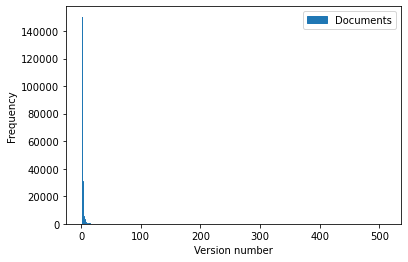

In [17]:
#We saw above that the versions range from 1 to 511. Let's represent all of them:
ax = df['Version'].plot(bins=511,range=(1,511), kind="hist",fill=True,histtype='step',label='Documents')
ax.set_xlabel('Version number')
plt.legend()
plt.show()

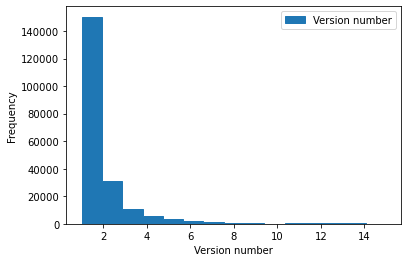

In [18]:
#This shows in a visual way that the vast majority of documents find themselves in the first values. 
#Let's focus at those first values and represent only the 15 most common occurences:
ax = df['Version'].plot(bins=15,range=(1,15), kind="hist",fill=True,histtype='step',label='Version number')
ax.set_xlabel('Version number')
plt.legend()
plt.show()

In [19]:
#to further analyse how people work, I count the occurences of working time on documents
df['Working_days'].value_counts().head(15)

0 days      124509
1 days        5990
2 days        3193
4 days        2088
3 days        1967
7 days        1645
6 days        1586
5 days        1296
8 days        1180
14 days        930
12 days        883
74 days        854
264 days       802
21 days        800
56 days        793
Name: Working_days, dtype: int64

In [20]:
#I count how many occurrences of each File_type I have. Here I really want detail, I show the first 50
df['File_type'].value_counts().head(50)

pdf           66295
docx          38235
xlsx          35248
jpg           12796
pptx           9579
doc            9047
xls            5300
gif            3817
xlsm           3382
eml            3367
xlsb           3346
msg            3317
jpeg           2404
xml            2033
png            1142
ppt            1050
txt             866
atx             534
mp4             471
dta             440
rdl             359
gdbtable        329
gdbtablx        328
teq             317
gdbindexes      299
ors             242
svg             238
emf             237
db              234
log             234
lnk             222
csv             220
docm            174
spx             147
dotx            129
js              128
css             120
pptm            115
dat             107
tif             106
mp3              97
pub              89
shx              87
freelist         87
prj              87
dbf              87
shp              87
ai               83
dwg              80
m4a              74


### Question about file types
There are a lot of different files, especially with fewer occurrences. Many of them do not allow editing, like .pdf, images... this will contaminate our study because we want to assess collaboration (editing) on files.
In addition, we find that we have just different extensions of the same kind of document (.doc and .docx are both word documents).
Therefore, we will have to clean this data, first by unifying extensions of the same kind (Textual, Presentation, Worksheets...) and later, by selecting only this data in a new dataframe

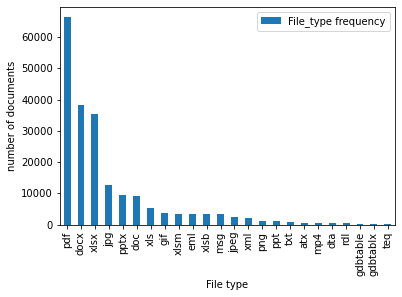

In [21]:
#For the sake of visualisation we represent the File_type with more than 300 occurrences in a graphic.
ax= df['File_type'].value_counts().loc[lambda x : x>300].plot(kind='bar',fill=True,label='File_type frequency')
ax.set_xlabel("File type")
ax.set_ylabel("number of documents")
plt.legend()
plt.show()

In [22]:
#Now we change the different extensions of the same kind of document, starting by the textual ones
pattern = '|'.join(['dotx', 'docx','docm', 'doc', 'dot','txt', 'css', 'prj'])
df['File_type'] = df['File_type'].str.replace(pattern, 'Textual').copy()
#and we print the result to see if it worked  
df['File_type'].value_counts().head(10)

pdf        66295
Textual    48666
xlsx       35248
jpg        12796
pptx        9579
xls         5300
gif         3817
xlsm        3382
eml         3367
xlsb        3346
Name: File_type, dtype: int64

In [23]:
#We modify now the presentations
pattern = '|'.join(['pptx', 'pptm','ppt'])
df['File_type'] = df['File_type'].str.replace(pattern, 'Presentation').copy()
#and we print the result to see if it worked  
df['File_type'].value_counts().head(10)

pdf             66295
Textual         48666
xlsx            35248
jpg             12796
Presentation    10744
xls              5300
gif              3817
xlsm             3382
eml              3367
xlsb             3346
Name: File_type, dtype: int64

In [24]:
#We modify now the calculations (worksheets)
pattern = '|'.join(['xlsx', 'xlsm','xlsb', 'xls'])
df['File_type'] = df['File_type'].str.replace(pattern, 'Worksheet').copy()
#and we print the result to see if it worked  
df['File_type'].value_counts().head(10)

pdf             66295
Textual         48666
Worksheet       47276
jpg             12796
Presentation    10744
gif              3817
eml              3367
msg              3317
jpeg             2404
xml              2033
Name: File_type, dtype: int64

In [25]:
#I will create a subset of data with only these three kinds of documents, to later work on it.
collab_df = df.loc[df['File_type'].isin(['Textual','Worksheet', 'Presentation'])].copy()
collab_df.head()
#print(df.loc[df['File_type'].isin(['Textual','Worksheet', 'Presentation'])])

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Presentation,FAD,1.44,5,49.54,2020-08-28,2020-09-04,7 days
1,Worksheet,FAD,0.62,128,71.46,2020-02-05,2020-09-04,212 days
5,Worksheet,FAD,0.05,211,9.27,2020-05-25,2020-09-04,102 days
6,Worksheet,FAD,1.29,136,410.04,2019-12-19,2020-09-04,260 days
7,Worksheet,FAD,0.09,144,11.53,2020-01-07,2020-09-04,241 days


In [26]:
#I count how many occurrences of each Service I have
df['Service'].value_counts().head()

FAD       96390
PROT      48285
REM       31901
ASSIST    29911
PRES       3281
Name: Service, dtype: int64

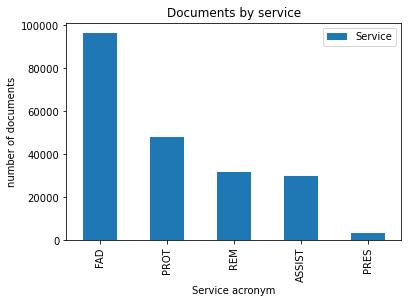

In [27]:
#And we also represent this in a graphic, nicer way to show it.
ax = df.Service.value_counts().plot(kind="bar",fill=True,label='Service', title='Documents by service')
ax.set_xlabel("Service acronym")
ax.set_ylabel("number of documents")
plt.legend()
plt.show()

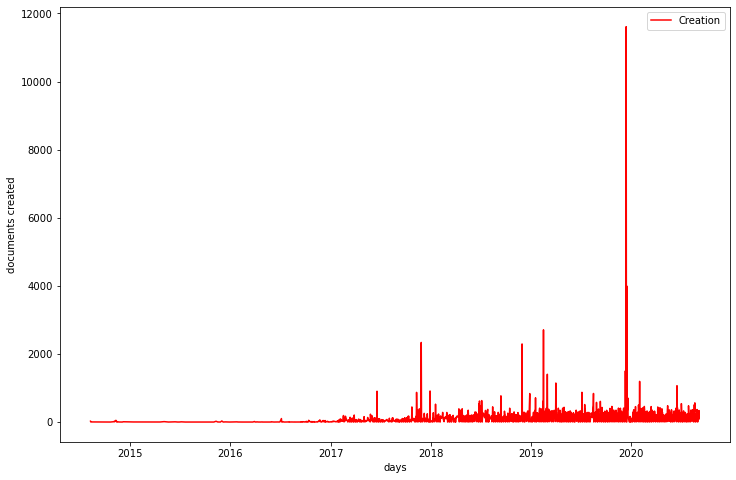

In [28]:
#to finalise, we plot a timeline to show how many documents are created per day
ax = df.Created.value_counts().plot(kind='line', color='Red', label='Creation', figsize=(12,8))
ax.set_xlabel("days")
ax.set_ylabel("documents created")
plt.legend()
plt.show()

This shows two interesting things:
- First, until 2017 the usage of sharepoint was limited. It is from this year onward that we see a relevant usage. 
- Secondly: something very interesting: there has been 5 times when more than 2000 items were created. Let's look into detail to those pics, and see what dates they were:

In [29]:
df['Created'].value_counts().head(5)

2019-12-13    11610
2019-12-16     3990
2019-02-15     2708
2017-11-27     2338
2018-11-29     2294
Name: Created, dtype: int64

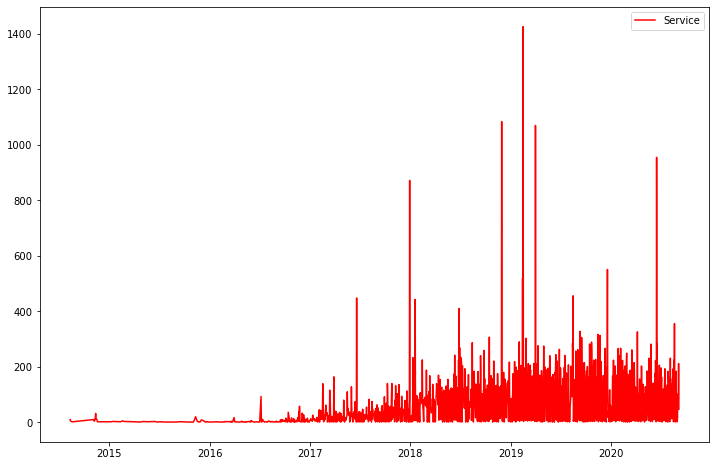

In [30]:
#We check the same information in the collaborative subset of data:
collab_df.Created.value_counts().plot(kind='line', color='Red', label='Service', figsize=(12,8))
plt.legend()
plt.show()

Here we notice that although there are still some individual pics, (3 times above 1000 documents created, 5 times above 600) the pattern is more stable.

Finally, we make an export of our dataframes (both the complete and the "collaborative" one) in order to back-up it, and be able to skip all cleaning process in case we want to reuse the file, or in case of emergency.

In [ ]:
df.to_csv('CleanSPdata.csv')
collab_df.to_csv('CollabCleanSPdata.csv')